In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('M6_T1_V4_BrakingDistance.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [4]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


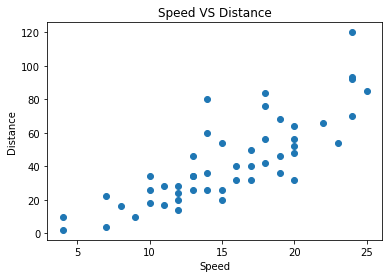

In [5]:
plt.scatter(df['speed'],df['dist'])
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.title("Speed VS Distance")
plt.show()

In [6]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


<AxesSubplot:xlabel='speed', ylabel='Density'>

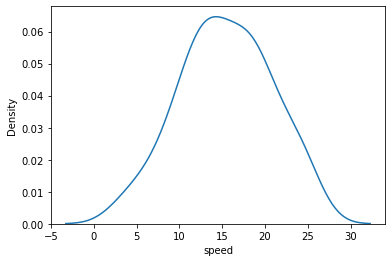

In [7]:
sns.kdeplot(df['speed'])

<AxesSubplot:xlabel='dist', ylabel='Density'>

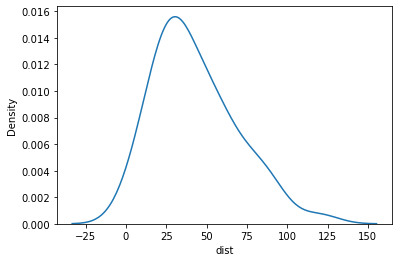

In [8]:
sns.kdeplot(df['dist'])

In [9]:
xbar = df.speed.mean()
xbar

15.4

In [10]:
ybar = df.dist.mean()
ybar

42.98

In [11]:
Beta1 = np.sum((df['speed'] - xbar)*(df['dist']-ybar))/np.sum((df['speed']-xbar)**2)
Beta1

3.932408759124088

In [12]:
Beta0 = ybar - Beta1*xbar
Beta0

-17.57909489051096

In [13]:
df['pred'] = Beta0 + Beta1*df['speed']
df

,speed,dist,pred
0,4,2,-1.849460
1,4,10,-1.849460
2,7,4,9.947766
3,7,22,9.947766
4,8,16,13.880175
5,9,10,17.812584
6,10,18,21.744993
7,10,26,21.744993
8,10,34,21.744993
9,11,17,25.677401


C:\Users\devro\Ardy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pred', ylabel='Density'>

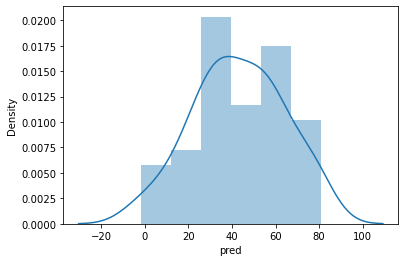

In [14]:
sns.distplot(df['pred'])

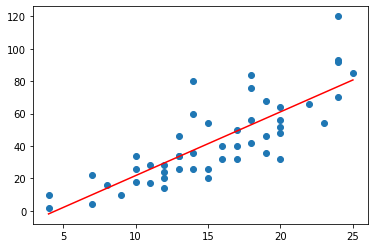

In [15]:
plt.scatter(df['speed'],df['dist'])
plt.plot(df['speed'],df['pred'],color='r')
plt.show()

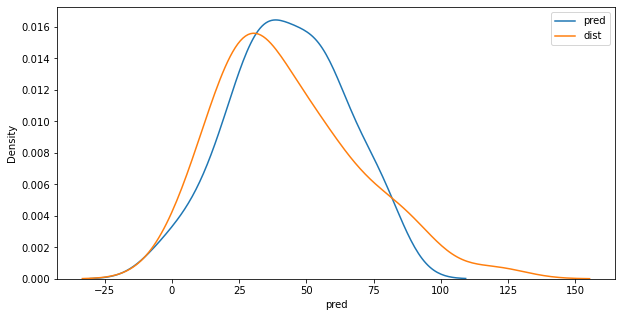

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['pred'])
sns.kdeplot(df['dist'])
plt.legend(['pred','dist'])
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

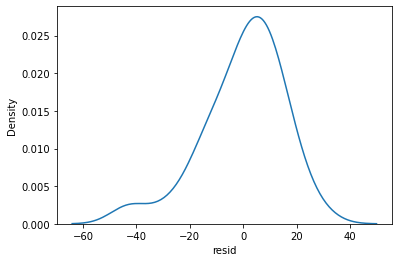

In [17]:
df['resid'] = df['pred'] - df['dist']
sns.kdeplot(df['resid'])

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
formula = 'dist ~ speed'
lm = smf.ols(formula = formula,data = df).fit()

In [20]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.49e-12
Time:                        10:45:01   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

In [21]:
lm.params

Intercept   -17.579095
speed         3.932409
dtype: float64

In [22]:
df.corr()

,speed,dist,pred,resid
speed,1.000000e+00,0.806895,1.000000e+00,1.008911e-16
dist,8.068949e-01,1.000000,8.068949e-01,-5.906950e-01
pred,1.000000e+00,0.806895,1.000000e+00,1.594356e-16
resid,1.008911e-16,-0.590695,1.594356e-16,1.000000e+00


In [23]:
0.806895**2

0.6510795410250001

In [24]:
-17.5791/6.758

-2.601228174015981

In [25]:
import scipy.stats as stats
stats.t.cdf(-2.601228174015981,df=49)*2

0.01224838899297348

In [26]:
pred_lm1 = lm.predict(df['speed'])
pred_lm1

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

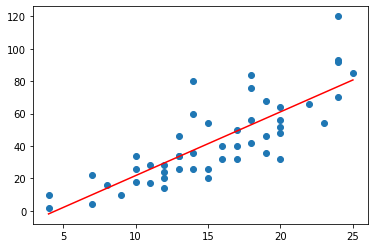

In [27]:
plt.scatter(df['speed'],df['dist'])
plt.plot(df['speed'],pred_lm1,color='r')

In [28]:
X = df['speed']
y = df['dist']
print(df.shape)
model= sm.OLS(y,X).fit()
print(model.summary())

(50, 4)
                                 OLS Regression Results                                
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                    9.23e-26
Time:                        10:45:02   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [29]:
X2 = sm.add_constant(X)
X2

,const,speed
0,1.0,4
1,1.0,4
2,1.0,7
3,1.0,7
4,1.0,8
5,1.0,9
6,1.0,10
7,1.0,10
8,1.0,10
9,1.0,11


In [30]:
model= sm.OLS(y,X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.49e-12
Time:                        10:45:03   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0

In [31]:
pred_method2 = model.predict(X2)

In [32]:
pred_method2

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

In [33]:
df = pd.read_csv('M6_T2_V1_Diamonds.csv')
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [35]:
df.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='price', ylabel='Density'>

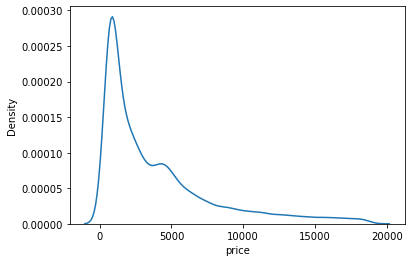

In [36]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='carat', ylabel='Density'>

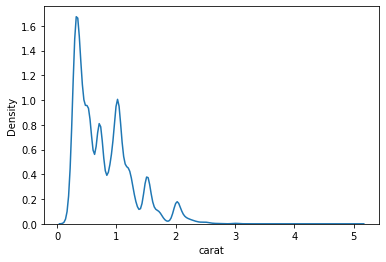

In [37]:
sns.kdeplot(df['carat'])

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

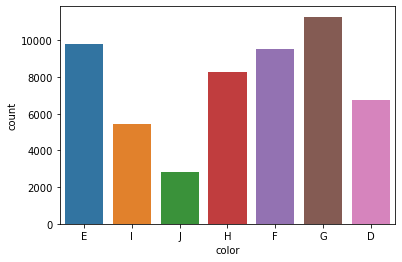

In [43]:
sns.countplot(df['color'])

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

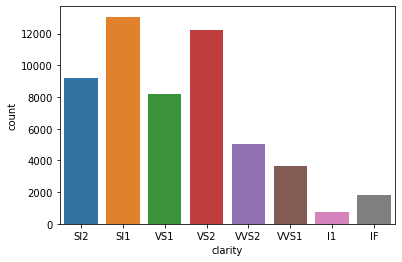

In [44]:
sns.countplot(df['clarity'])

<AxesSubplot:ylabel='price'>

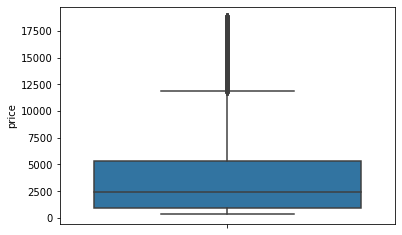

In [47]:
sns.boxplot(y=df['price'])

<AxesSubplot:ylabel='carat'>

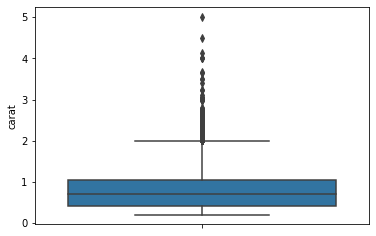

In [48]:
sns.boxplot(y=df['carat'])

In [50]:
df[df['price']<2500]

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53635,0.30,Ideal,I,VVS1,552,4.30,4.33,2.68
53636,0.30,Ideal,D,SI1,552,4.28,4.32,2.65
53637,0.30,Very Good,D,SI1,552,4.26,4.28,2.67
53638,0.30,Ideal,D,SI1,552,4.29,4.33,2.63


In [52]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
price      11602
x            554
y            552
z            375
dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

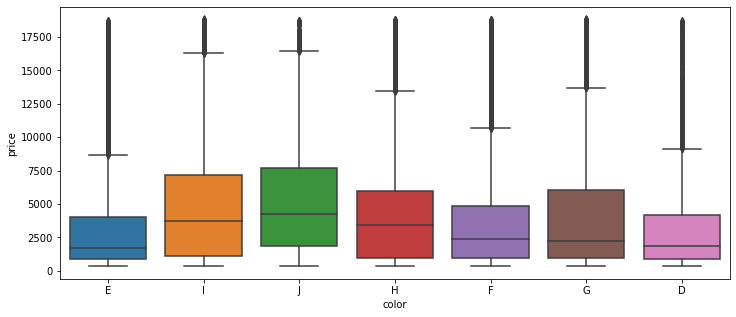

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(y=df['price'],x=df['color'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

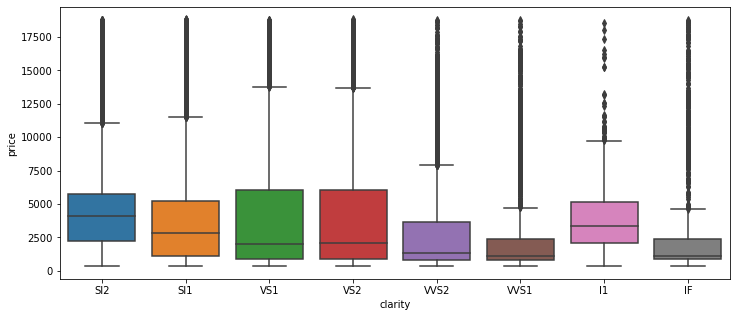

In [58]:
plt.figure(figsize=(12,5))
sns.boxplot(y=df['price'],x=df['clarity'])

<AxesSubplot:xlabel='cut', ylabel='price'>

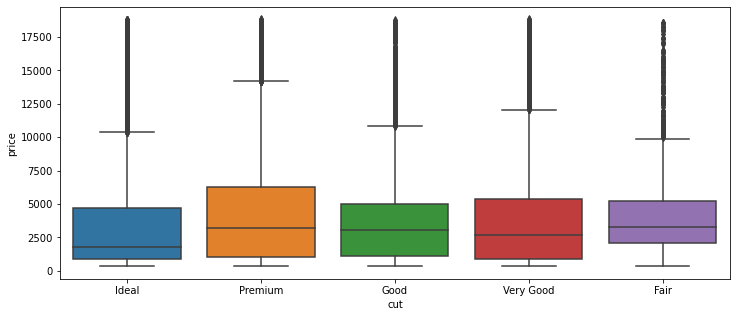

In [60]:
plt.figure(figsize=(12,5))
sns.boxplot(y=df['price'],x=df['cut'])

In [62]:
a = np.random.normal(loc=10,scale=2,size=(1000))
a

array([11.39074011, 11.05711137,  8.19861774,  9.28713358,  5.86738198,
        9.92592679,  9.41008194, 10.26296476,  9.23926704,  8.69031624,
        8.07525853, 11.12933479,  7.78580942,  8.21435077, 10.07279975,
        7.05878398, 11.46856489, 10.47968103, 10.20602435, 11.81174825,
        7.22540898,  9.22236379,  8.58769777,  9.28131118, 11.89091967,
       11.58562553, 15.81956689, 13.47570459, 11.00302405, 10.34067874,
       10.08339798, 11.39001367, 12.38733171, 10.54092675, 12.76449939,
       11.6515065 , 12.04512686, 13.86200702,  6.88681384, 12.41068582,
        9.77252714,  5.8618946 , 11.34717222, 11.49302903,  7.97113665,
       10.2628501 ,  9.55406989,  7.43325728, 11.25937337,  6.79819638,
        8.51475478, 10.173152  ,  8.18863653, 13.24289188, 13.16404023,
       11.13294544,  8.86301576,  9.67188577,  9.13401868, 10.50782116,
        8.34018974,  8.90123524, 10.62453383, 10.89400993,  9.38404843,
       14.00503553, 10.65961673, 11.05903517, 14.26383691,  8.08

In [63]:
b = np.random.randn(1000)
b

array([ 7.62776754e-01,  1.05223035e+00, -1.08715391e+00,  7.43746319e-01,
        8.10310132e-01, -3.19551667e-01, -5.25099101e-01,  5.33535464e-01,
        3.80288223e-01, -1.60275167e-01,  4.98255154e-01, -4.38772732e-01,
        4.91016574e-01,  1.52815668e-01, -1.21989721e+00,  3.98940339e-01,
       -7.56899595e-01,  1.03153469e+00,  2.85112136e+00,  8.81946136e-01,
       -6.86944006e-01, -1.11218606e+00, -6.13538567e-01, -3.80499390e-01,
        7.05842599e-01, -1.96845090e+00, -9.05948426e-01, -2.84795135e-01,
       -2.54270741e-02,  4.97894533e-01,  2.75020378e-01,  1.34902561e+00,
        3.83034281e-03, -7.67956962e-02,  4.59607083e-01,  6.93967392e-01,
       -3.58115371e-01,  1.01808788e+00, -4.89206257e-01,  8.36857436e-01,
        1.81500800e-01,  5.11817100e-01, -1.38111731e+00, -1.21655827e-01,
       -2.94019412e-01,  1.07419636e-01, -4.72590127e-02, -6.00833761e-01,
       -1.64746781e+00,  9.95065386e-01,  1.01658760e+00,  2.45428150e-01,
       -1.54093221e+00,  

In [68]:
c = np.random.randint(low = -99999,high = 8888,size=(1000))
c

array([-71558,  -5191, -24269, -92122, -18629, -23375, -13874,   5640,
       -99669, -87870,   2993, -93291, -16863, -26102, -21492, -29675,
       -29732, -18556, -91626, -54879,   -801, -23744, -77146, -10341,
       -78841,   2281, -56395,  -3511, -59025, -98144, -37931, -48988,
       -33171, -31590, -86422, -67614, -25531, -63722, -89436, -12585,
       -69987, -28747, -65488, -26628, -25944, -70708, -24347,   2884,
       -37309, -13427, -96658, -21674,   5266, -34121, -48264, -79257,
       -12457, -94921, -97709, -76782, -15417, -77347, -27296, -25862,
          384,   -197, -23414, -39279,   8115, -42286, -88594, -46614,
       -42712, -37765, -40856, -47705,  -5101, -11790, -94266,   -606,
       -13031,   1261, -32019, -51211,    104,  -1391, -10090, -46073,
         -152, -17674,   4643, -90249, -32352, -79679, -29019, -96389,
       -66013, -71848, -25289, -73513, -87471,  -9364,  -4571, -15301,
       -51575, -35806, -29839,  -1074, -50183, -51997, -33387,   2768,
      

In [82]:
d = pd.DataFrame(np.c_[a,b,c],columns=['normal','randn','randint'])
d

,normal,randn,randint
0,11.390740,0.762777,-71558.0
1,11.057111,1.052230,-5191.0
2,8.198618,-1.087154,-24269.0
3,9.287134,0.743746,-92122.0
4,5.867382,0.810310,-18629.0
...,...,...,...
995,11.961514,-0.811493,-70517.0
996,10.230210,-0.002783,-55828.0
997,6.346387,-1.739123,-97020.0
998,9.362289,-0.365515,-67354.0


In [ ]:
d['tmp'] = d['normal']
d['normal'] = d['randn']
d['randn'] = d['tmp']
d.drop(['tmp'],inplace=True,axis=1)
d

In [84]:
df.corr()

,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

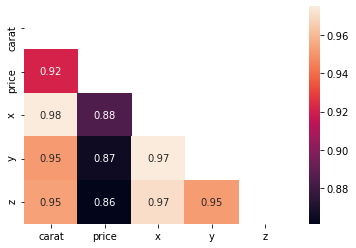

In [90]:
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask,annot=True)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

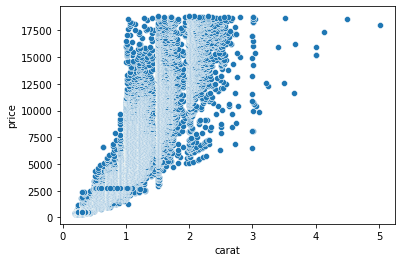

In [92]:
sns.scatterplot(df.carat,df.price)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

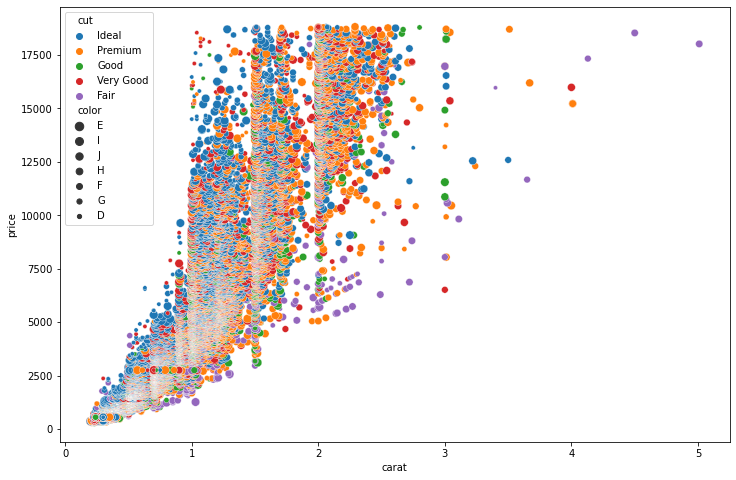

In [95]:
plt.figure(figsize=(12,8))
sns.scatterplot(df.carat,df.price,hue=df.cut,size=df.color)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

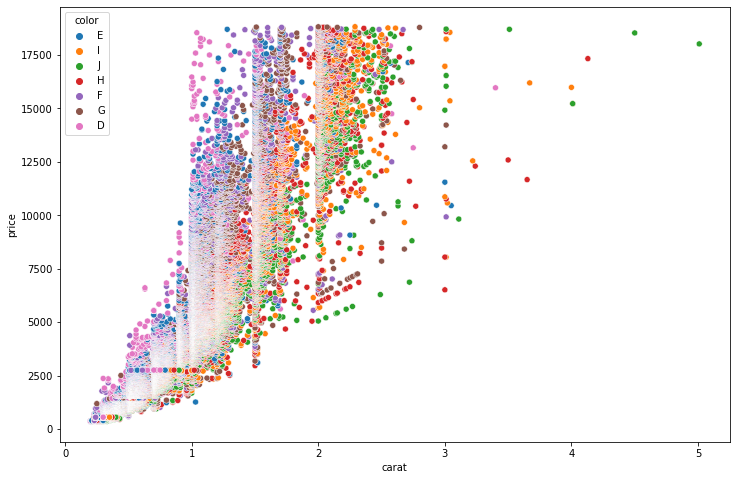

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(df.carat,df.price,hue=df.color)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

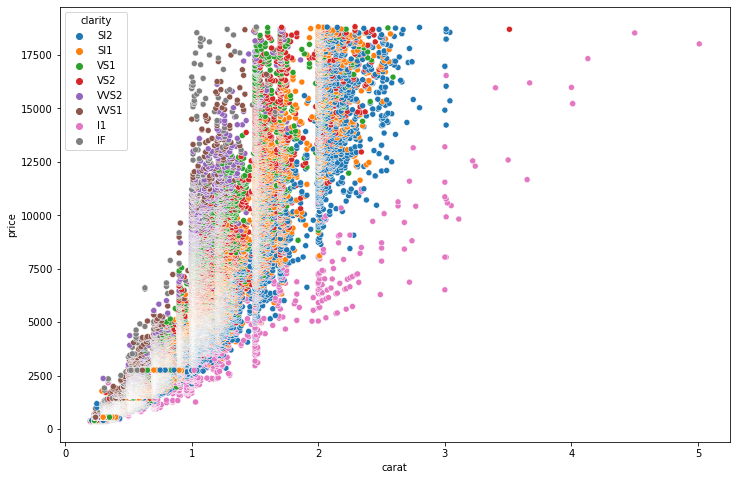

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(df.carat,df.price,hue=df.clarity)

In [98]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z'], dtype='object')

In [99]:
formula = 'price ~ carat + cut + color + clarity + x + y + z'

In [101]:
lm = smf.ols(formula=formula,data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:32:44   Log-Likelihood:            -4.5584e+05
No. Observations:               53940   AIC:                         9.117e+05
Df Residuals:                   53918   BIC:                         9.119e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3642.4909     91.784  

In [102]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
price      11602
x            554
y            552
z            375
dtype: int64

In [104]:
pred = lm.predict(df)

<AxesSubplot:xlabel='price', ylabel='Density'>

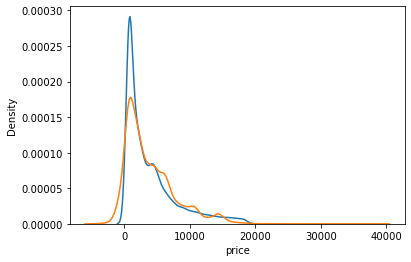

In [106]:
sns.kdeplot(x='price',data=df)
sns.kdeplot(pred)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

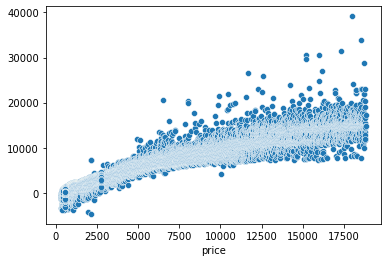

In [107]:
sns.scatterplot(df['price'],pred)

In [108]:
res = pred-df['price']


C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

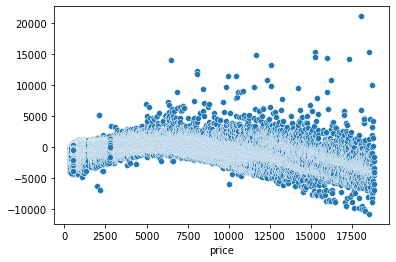

In [109]:
sns.scatterplot(df['price'],res)

<AxesSubplot:ylabel='Density'>

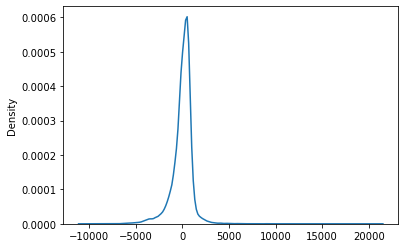

In [110]:
sns.kdeplot(res)

<AxesSubplot:xlabel='price', ylabel='Density'>

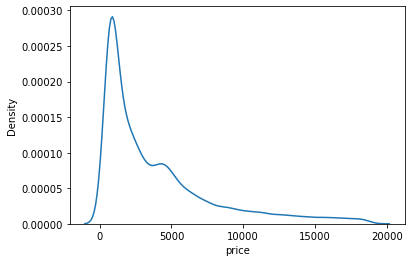

In [111]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='carat', ylabel='Density'>

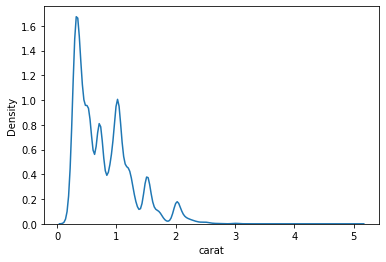

In [112]:
sns.kdeplot(df['carat'])

In [121]:
df['logprice'] = np.log(df.price)
df['logcarat'] = np.log(df.carat)

<AxesSubplot:xlabel='price', ylabel='Density'>

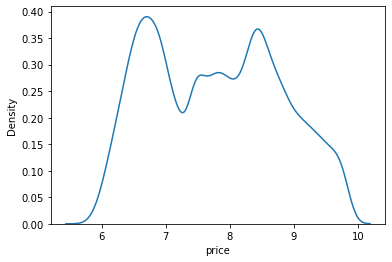

In [122]:
sns.kdeplot(df.logprice)

<AxesSubplot:xlabel='carat', ylabel='Density'>

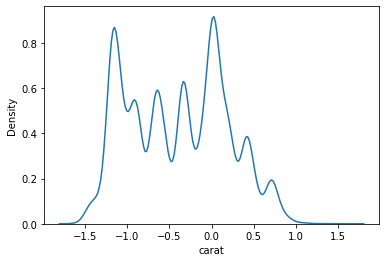

In [123]:
sns.kdeplot(df.logcarat)

<AxesSubplot:>

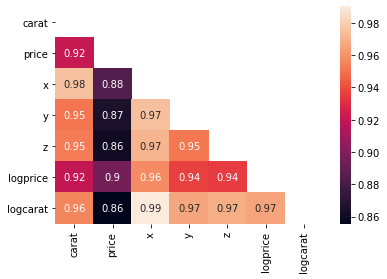

In [124]:
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask,annot=True)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logprice', ylabel='logcarat'>

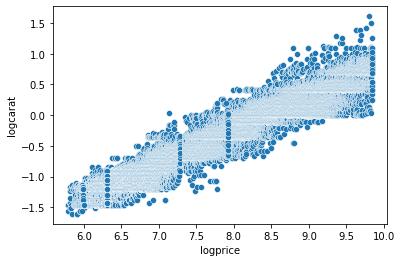

In [125]:
sns.scatterplot(df['logprice'],df['logcarat'])

In [126]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z', 'logprice',
       'logcarat'],
      dtype='object')

In [130]:
formula = 'logprice ~ logcarat + cut + color + clarity + x + y + z'
lm = smf.ols(formula = formula,data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:59:03   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4967      0.026  

In [131]:
pred = lm.predict(df)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logprice'>

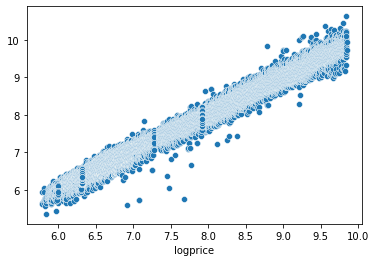

In [132]:
sns.scatterplot(df['logprice'],pred)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logprice'>

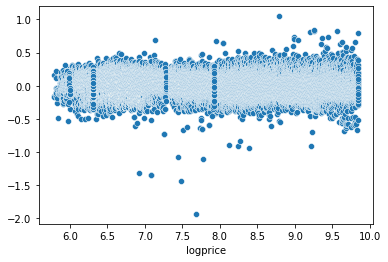

In [134]:
res = pred - df['logprice']
sns.scatterplot(df['logprice'],res)

<AxesSubplot:ylabel='Density'>

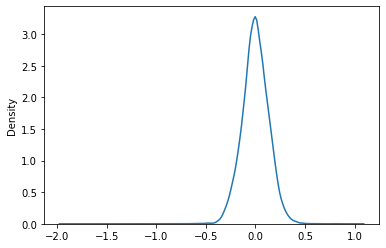

In [135]:
sns.kdeplot(res)

In [136]:
np.exp(pred)

0         280.647327
1         274.385712
2         382.933084
3         417.744262
4         285.099003
            ...     
53935    2942.134316
53936    2716.710405
53937    2671.815551
53938    2651.669895
53939    2692.910409
Length: 53940, dtype: float64

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

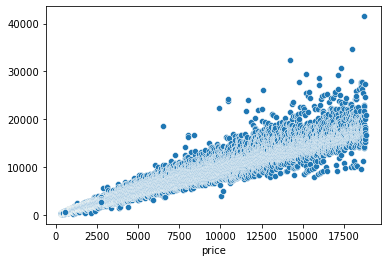

In [137]:
sns.scatterplot(df['price'],np.exp(pred))

In [138]:
df

,carat,cut,color,clarity,price,x,y,z,logprice,logcarat
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,5.786897,-1.469676
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,5.786897,-1.560648
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,5.789960,-1.469676
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,5.811141,-1.237874
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,5.814131,-1.171183
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50,7.921898,-0.328504
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61,7.921898,-0.328504
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56,7.921898,-0.356675
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74,7.921898,-0.150823


In [140]:
df_new = pd.get_dummies(df,columns=['color','cut','clarity'])

In [141]:
df_new

,carat,price,x,y,z,logprice,logcarat,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,5.786897,-1.469676,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,5.786897,-1.560648,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,5.789960,-1.469676,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,5.811141,-1.237874,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,5.814131,-1.171183,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2757,5.75,5.76,3.50,7.921898,-0.328504,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2757,5.69,5.75,3.61,7.921898,-0.328504,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,2757,5.66,5.68,3.56,7.921898,-0.356675,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53938,0.86,2757,6.15,6.12,3.74,7.921898,-0.150823,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [142]:
X = df_new.drop(['carat','price','logprice'],axis=1)
Y = df['logprice']

In [145]:
X2 = sm.add_constant(X)
X2

,const,x,y,z,logcarat,color_D,color_E,color_F,color_G,color_H,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,3.95,3.98,2.43,-1.469676,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,3.89,3.84,2.31,-1.560648,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1.0,4.05,4.07,2.31,-1.469676,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,4.20,4.23,2.63,-1.237874,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1.0,4.34,4.35,2.75,-1.171183,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.0,5.75,5.76,3.50,-0.328504,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,1.0,5.69,5.75,3.61,-0.328504,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,1.0,5.66,5.68,3.56,-0.356675,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
53938,1.0,6.15,6.12,3.74,-0.150823,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [149]:
lm = sm.OLS(Y,X2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:09:58   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5138      0.017    321.180

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40455, 24) (40455,)
(13485, 24) (13485,)


In [155]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9825823999497206
0.9829748277865862
